<a href="https://colab.research.google.com/github/Akashkc7/CODSOFT/blob/main/CREDIT_CARD_FRAUD_DETECTION_Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CREDIT CARD FRAUD DETECTION**

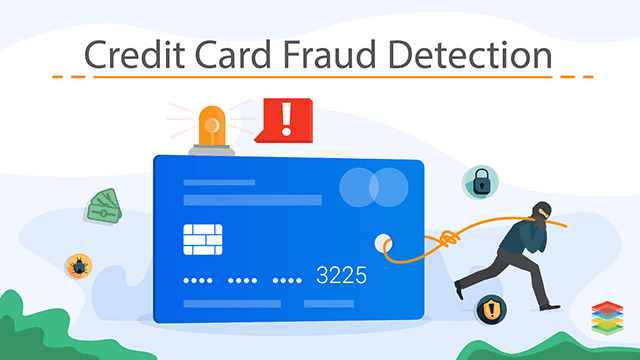




*   The credit card dataset contains transaction data used for fraud detection.
 It includes features like time, transaction amount, and anonymized features
 (V1-V28).
*   The dataset has imbalanced classes, with mostly legitimate transactions
(Class 0) and fewer fraudulent ones (Class 1).


*    My goal is to build a model that accurately classify transactions as
fraudulent or legitimate, using techniques like regularization and evaluation
metrics such as precision, recall, and F1-score.




    
    
   



In [251]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay

In [210]:
df=pd.read_csv("/content/drive/MyDrive/creditcard/creditcard.csv")

In [211]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [212]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [213]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [215]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [216]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [217]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64








*   0-Normal Transaction 1-Fraudulent Transaction




*   This dataset is highly unbalanced






**Data Preprocessing**

In [218]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [219]:
#seperating the data for analaysis
legit=df[df.Class==0]
fraud=df[df.Class==1]

In [220]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [221]:
#statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [222]:
fraud.Amount.describe()


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [223]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**DATA VISUALISATION**

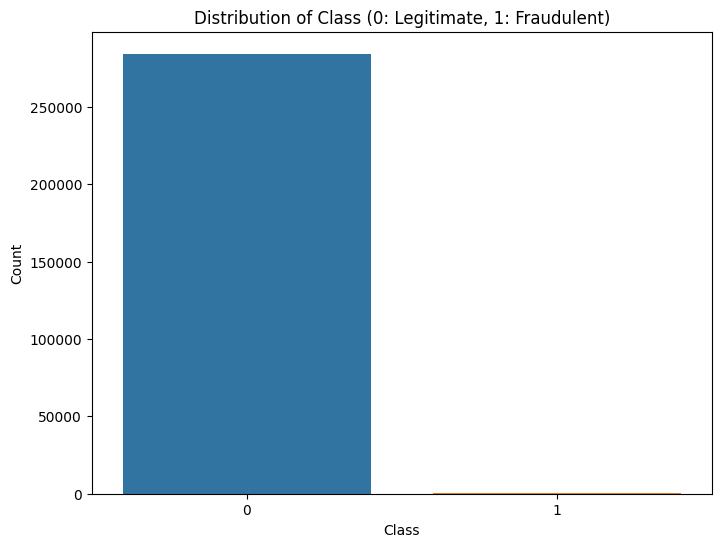

In [224]:
# Ploting the distribution of the Class variable
plt.figure(figsize=(8, 6))
sns.countplot(x=df['Class'])
plt.title('Distribution of Class (0: Legitimate, 1: Fraudulent)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


**The visualization confirms our expectations: the dataset is highly imbalanced with a dominant presence of legitimate transactions (Class = 0) compared to the rare instances of fraudulent ones (Class = 1). Such class imbalance can be a challenge for machine learning models, as they might become biased towards predicting the majority class**


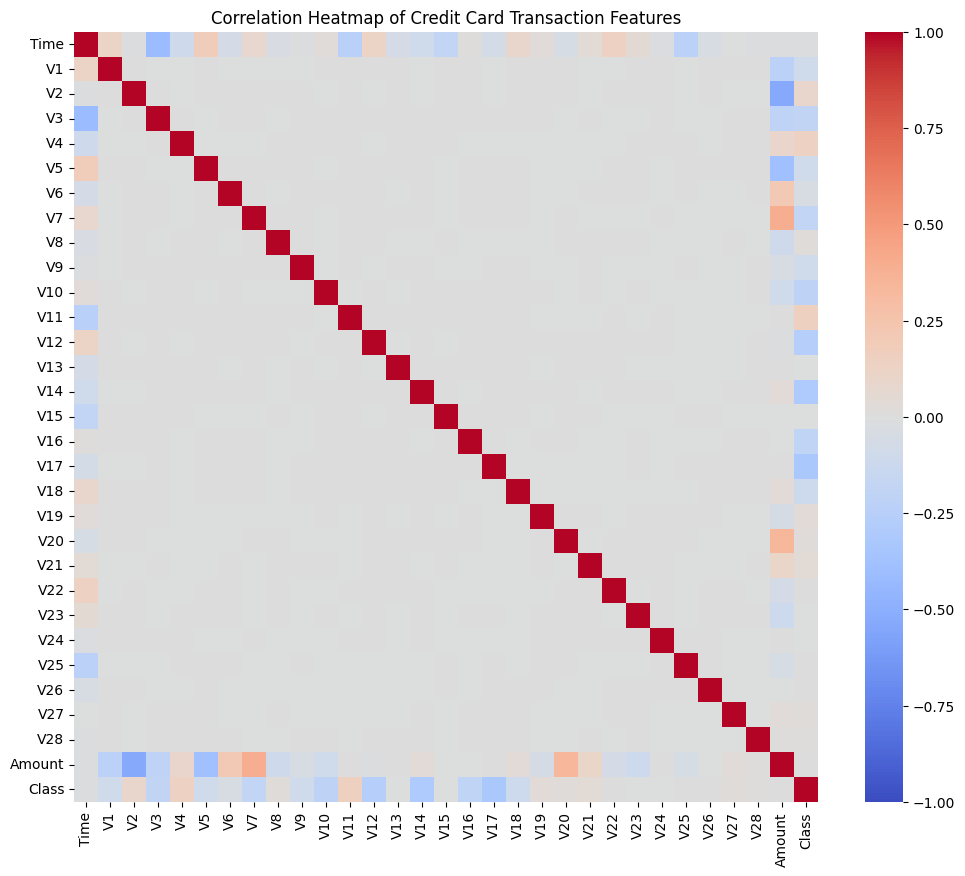

In [225]:
# Computing the correlation matrix
correlation_matrix = df.corr()


# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Credit Card Transaction Features')
plt.show()

**The heatmap presents the correlation between the features:**

   


*    Most of the PCA transformed features (V1 to V28) have little to no
correlation with each other. This is expected since PCA (Principal Component
Analysis) is designed to produce orthogonal (uncorrelated) components.

*   The Amount feature shows some correlation with a few of the PCA components
 but not significantly high.

*    The Class (target variable) has varying degrees of correlation with the
PCA features. Some features like V11 and V17 appear to have stronger
correlations, suggesting they might be important predictors for fraud detection.






    

   



## **Under Sampling**

Building a sample dataset containing a similar distribution of normal transaction and fraudulent


In [226]:
legit_sample=legit.sample(n=367)

In [227]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)

In [228]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
65405,51568.0,1.296755,0.240800,-0.167971,0.309405,0.208196,-0.100002,-0.073837,0.043763,-0.074137,...,-0.318592,-0.970176,-0.021461,-0.903907,0.325457,0.151662,-0.031299,0.007492,0.89,0
121469,76203.0,-1.633348,-1.260286,1.777633,-3.542764,-1.052632,-1.370098,-0.343778,0.061241,0.827781,...,-0.081844,0.385041,0.226202,0.381448,-0.138961,-0.221406,0.502716,0.388834,125.00,0
78236,57435.0,-1.645005,1.936161,0.322788,-0.336037,-0.265429,-0.538873,0.172531,0.634549,0.002824,...,-0.338606,-0.791803,-0.037035,-0.478628,0.102062,0.111715,0.169019,-0.050344,8.99,0
55461,46949.0,-6.493077,3.361598,-1.485286,0.073772,-2.832978,-1.067662,-1.630304,2.276587,1.988283,...,-0.285269,0.535645,0.473493,0.778965,0.689027,0.480408,0.618219,0.300537,29.99,0
85795,60942.0,-3.509634,1.570807,-0.014855,0.192813,-0.461692,0.498625,-0.140007,0.635606,1.438482,...,-0.320620,0.034641,-0.138016,-0.266257,-0.562200,0.161752,-0.843221,-0.463993,28.20,0


In [229]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [230]:
new_dataset['Class'].value_counts()

1    492
0    367
Name: Class, dtype: int64

In [231]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_dataset.drop(columns='Class'))
scaled_legal_fraud_df = pd.DataFrame(scaled_data, columns=new_dataset.columns[:-1])

In [232]:
scaled_legal_fraud_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.713254,0.723655,-0.457049,0.600274,-0.713826,0.463017,0.344267,0.502954,-0.053204,0.564082,...,-0.232914,-0.253439,-0.752751,0.017839,-1.482431,0.431181,0.237926,-0.140503,-0.075783,-0.369676
1,-0.205612,0.217471,-0.831664,0.900780,-1.896947,0.180990,-0.331979,0.459226,-0.049888,0.936493,...,-0.390455,-0.176582,0.321750,0.208145,0.763835,-0.239412,-0.545081,0.358945,0.730952,-0.002158
2,-0.592356,0.215457,-0.033950,0.676074,-0.912061,0.357075,0.110596,0.542863,0.058876,0.595860,...,0.119133,-0.259936,-0.611326,0.005872,-0.739220,0.108611,0.154084,0.046848,-0.198136,-0.345690
3,-0.808436,-0.622063,0.321786,0.396810,-0.786196,-0.217245,-0.170951,0.250823,0.370391,1.415676,...,-0.058126,-0.242621,0.441159,0.398164,1.458529,0.956155,0.927909,0.466971,0.544158,-0.283504
4,-0.520088,-0.106664,-0.125129,0.623924,-0.749635,0.313174,0.662999,0.492235,0.059076,1.188658,...,-0.060316,-0.254097,0.043931,-0.071722,-0.368085,-0.850545,0.259103,-0.899869,-1.073217,-0.288805


**SPLITING DATA**

In [233]:
x=scaled_legal_fraud_df
y=new_dataset['Class']

In [234]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.713254,0.723655,-0.457049,0.600274,-0.713826,0.463017,0.344267,0.502954,-0.053204,0.564082,...,-0.232914,-0.253439,-0.752751,0.017839,-1.482431,0.431181,0.237926,-0.140503,-0.075783,-0.369676
1,-0.205612,0.217471,-0.831664,0.900780,-1.896947,0.180990,-0.331979,0.459226,-0.049888,0.936493,...,-0.390455,-0.176582,0.321750,0.208145,0.763835,-0.239412,-0.545081,0.358945,0.730952,-0.002158
2,-0.592356,0.215457,-0.033950,0.676074,-0.912061,0.357075,0.110596,0.542863,0.058876,0.595860,...,0.119133,-0.259936,-0.611326,0.005872,-0.739220,0.108611,0.154084,0.046848,-0.198136,-0.345690
3,-0.808436,-0.622063,0.321786,0.396810,-0.786196,-0.217245,-0.170951,0.250823,0.370391,1.415676,...,-0.058126,-0.242621,0.441159,0.398164,1.458529,0.956155,0.927909,0.466971,0.544158,-0.283504
4,-0.520088,-0.106664,-0.125129,0.623924,-0.749635,0.313174,0.662999,0.492235,0.059076,1.188658,...,-0.060316,-0.254097,0.043931,-0.071722,-0.368085,-0.850545,0.259103,-0.899869,-1.073217,-0.288805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,1.709539,0.166589,-0.236223,-0.071655,-0.271592,0.066049,-0.672950,0.371902,0.070763,-0.257943,...,0.813984,0.102745,-0.236607,0.525662,-0.418114,0.737363,1.574323,0.162505,0.221396,0.782568
855,1.713764,0.737787,-0.195362,-0.146707,-0.375231,0.515445,-0.308785,0.285996,-0.014358,0.129181,...,-0.001637,-0.029698,0.038852,-0.077580,-0.044418,0.714797,1.471631,0.252732,0.303200,-0.370061
856,1.713846,0.382831,-0.236045,0.284304,-0.665022,0.165800,0.395731,0.152911,0.168076,0.325373,...,0.015703,0.094058,0.677799,0.181052,0.153268,-1.106838,0.908396,0.248950,0.319542,-0.141661
857,1.726519,-0.038288,-0.370934,-0.207791,-0.250768,0.228414,-1.169742,0.157242,0.139349,-0.079313,...,0.062014,0.039341,-0.196980,-0.316144,-0.223737,-0.512616,1.191749,0.716368,-0.628339,0.353190


In [235]:
y

65405     0
121469    0
78236     0
55461     0
85795     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 859, dtype: int64

**Spliting into train and test data**

In [236]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)



In [237]:
print(x.shape,x_train.shape,x_test.shape)

(859, 30) (687, 30) (172, 30)


**Model Training**


In [265]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [266]:
model.fit(x_train, y_train)
lr_pred = model.predict(x_test)

**Evaluating the model**


In [267]:
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [268]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.950509461426492


In [270]:
#accuracy on test data
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(lr_pred,y_test)

In [271]:
print("Accuracy on Test data:",test_data_accuracy)

Accuracy on Test data: 0.9418604651162791


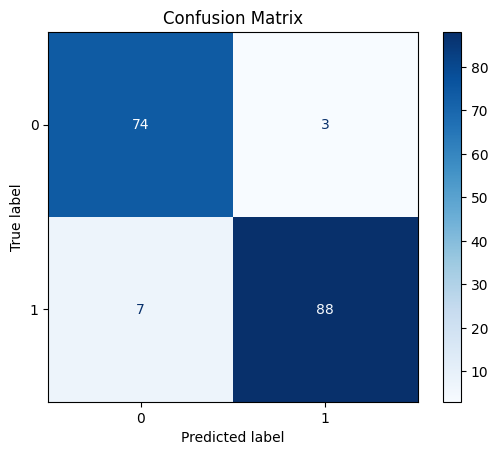

              precision    recall  f1-score   support

           0       0.91      0.96      0.94        77
           1       0.97      0.93      0.95        95

    accuracy                           0.94       172
   macro avg       0.94      0.94      0.94       172
weighted avg       0.94      0.94      0.94       172



In [272]:
def plot_confusion_matrix(y_test, lr_pred):
    acc = round(accuracy_score(y_test, lr_pred), 2)
    cm = confusion_matrix(y_test, lr_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()


plot_confusion_matrix(y_test, lr_pred)
print(classification_report(y_test, lr_pred))

In [273]:
# Random Forest Algorithm
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rf_pred = rfc.predict(x_test)



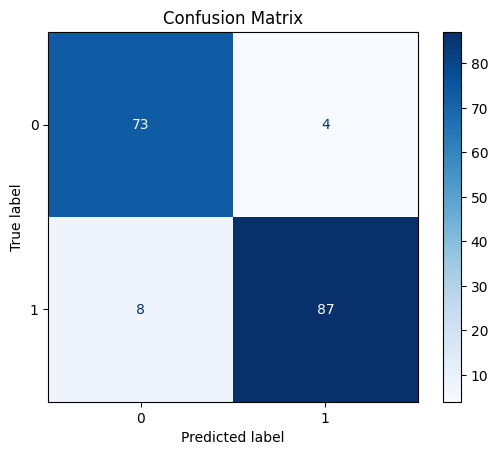

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        77
           1       0.96      0.92      0.94        95

    accuracy                           0.93       172
   macro avg       0.93      0.93      0.93       172
weighted avg       0.93      0.93      0.93       172



In [274]:
def plot_confusion_matrix(y_test, rf_pred):
    acc = round(accuracy_score(y_test, rf_pred), 2)
    cm = confusion_matrix(y_test, rf_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()


plot_confusion_matrix(y_test, rf_pred)
print(classification_report(y_test,rf_pred))

**CONCLUSION**

The credit card fraud detection project aimed to develop a robust and effective model for identifying fraudulent transactions. The logistic regression model achieved an impressive accuracy of 94%, demonstrating its ability to distinguish between legitimate and fraudulent transactions. A detailed analysis of the classification report provided further insights into the model's performance:


*   Precision and Recall:

        The model exhibited high precision for both non-fraudulent (Class 0)
         and fraudulent (Class 1) transactions, with values of 0.91 and 0.97,
          respectively.

        Recall values of 0.96 for Class 0 and 0.93 for Class 1 indicated the
        model's effectiveness in correctly identifying the majority of actual
        instances for both classes.


*   F1-Score:
        The F1-scores for Class 0 (0.94) and Class 1 (0.95) demonstrated a
        balanced performance between precision and recall, crucial for a fraud
        detection scenario.


*   Accuracy:
        The overall accuracy of 94% indicated the proportion of correctly
        classified instances across both classes.


*    Macro Avg and Weighted Avg:
        Macro avg and weighted avg metrics considered class imbalance,
        providing a comprehensive view of the model's performance.
        




    
    

    
    